In [1]:
# python main_inference_multimodal.py \
#         --model=LLM_Inference_Multimodal \
#         --model.llm_type="seqclf" \
#         --model.ckpt_path="models/multitask_multimodal_multilingual/version_11/epoch=3-step=776.ckpt" \
#         --model.config_path="models/multitask_multimodal_multilingual/version_11/config.yaml" \
#         --model.task="seqclf_singlemodal_wishquery2tax" \
#         --model.output_dir="models/multitask_multimodal_multilingual/version_11" \
#         --model.write_interval="batch" \
#         --data=JSONListData \
#         --data.llm_type="seqclf" \
#         --data.label_map_file="datasets/taxonomy/wish_v1.2.1_newtax_allpaths_withunknown.txt" \
#         --data.label_type="multilabel_taxonomy" \
#         --data.data_source_yaml_path="datasets/multimodal_multitask/wish_qcv2_tahoe_queries_for_debug.yaml" \
#         --data.input_dict="{'template': '{query}', 'task_prefix': 'Classify query: '}" \
#         --data.output_dict="{'template': '{query}'}" \
#         --data.data_source_type="dvc" \
#         --data.model_name="microsoft/Multilingual-MiniLM-L12-H384" \
#         --data.batch_size=50 \
#         --data.max_length=50 \
#         --data.num_workers=0 \
#         --data.predict_on_test=false \
#         --data.overwrite_cache=true \
#         --data.force_download_hfdata=true \
#         --trainer.logger=false \
#         --trainer.enable_checkpointing=false \
#         --trainer.accelerator gpu \
#         --trainer.strategy ddp

In [2]:
import pandas as pd
import dvc.api

In [3]:
df_predict = next(pd.read_json(
    '/workspaces/multitask-llm-rnd/modelling/models/multitask_multimodal_multilingual/version_11/seqclf-epoch=3-step=776--wish_qcv2_tahoe_queries_for_debug--test.json', 
lines=True, chunksize=1000))

In [5]:
df_predict.batch_indices.max()

1042

In [6]:
df_data = next(pd.read_json(dvc.api.get_url( 
    'datasets/notebooks/quali_analysis_queryv0v2/query_classify_v2_20230311.json',
    repo='git@github.com:ContextLogic/multitask-llm-rnd.git'
), lines=True, chunksize=2000))

In [8]:
df_data['batch_indices'] = list(range(len(df_data)))

In [10]:
df_predict[['preds']]

,preds,batch_idx,dataloader_idx,batch_indices,logits
0,[[automobiles & motorcycles > auto replacement...,0,0,2,"[-10.449645042419434, -10.90238094329834, -12...."
1,[[home & garden > home storage & organization ...,0,0,9,"[-11.65049934387207, -12.479292869567871, -12...."
2,"[[home & garden > home decor > wall stickers, ...",0,0,16,"[-11.421436309814453, -11.89892578125, -11.447..."
3,[[sports > cycling > cycling clothings > cycli...,0,0,23,"[-10.219569206237793, -10.827229499816895, -13..."
4,[[jewelry & accessories > beads & jewelry maki...,0,0,30,"[-8.183708190917969, -10.912673950195312, -12...."
...,...,...,...,...,...
995,[[automobiles & motorcycles > car lights > car...,2,0,1023,"[-9.436614990234375, -11.358139038085938, -13...."
996,"[[women's clothing > denim > jumpsuits, 0.4707...",2,0,924,"[-8.974891662597656, -10.633338928222656, -13...."
997,[[sports > camping & hiking > camp cooking sup...,2,0,1005,"[-7.622197151184082, -8.982149124145508, -10.6..."
998,[[education & office supplies > writing & corr...,2,0,985,"[-7.608272552490234, -10.917646408081055, -11...."


In [11]:
df_merge = df_data.merge(df_predict[['preds', 'batch_indices']], on='batch_indices', how='inner')

In [20]:
df_merge.sample(1).to_dict('records')

[{'query': 'new scratch',
  'categories': '3268,3253,5795',
  'category_names': 'Furniture & Scratchers,Cat Supplies,Drawing Toys',
  'weights': '0.45822420716285706,0.06953758746385501,0.030066547915339',
  'batch_indices': 170,
  'preds': [['home & garden > pet products > cat supplies > furniture & scratchers',
    0.740711212158203],
   ['home & garden > pet products > cat supplies', 0.08671364188194201],
   ['home & garden > pet products > cat supplies > cat toys',
    0.040665160864591],
   ['beauty & health > health care > massage & relaxation',
    0.029262162744998002],
   ['beauty & health > health care > massage products > massage tools',
    0.028451006859540003],
   ['unknown', 0.020713564008474003],
   ['beauty & health > health care > massage products', 0.012963269837200002],
   ['toys & hobbies > learning & education > drawing toys', 0.009843877516686],
   ['home & garden > pet products > cat supplies > cat crates & cages',
    0.008262438699603001],
   ['education & off

In [22]:
x = """winner_gmv	winner_relevance
-1	2
2	2
-1	2
-1	-1
-1	-1
0	-1
-1	2
-1	-1
-1	-1
0	0
0	0
2	2
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
0	0
-1	-1
-1	-1
2	2
2	2
0	0
0	0
0	0
2	2
2	2
2	2
0	0
2	2
2	2
-1	-1
2	2
0	0
2	2
2	2
2	2
-1	-1
-1	-1
-1	-1
0	2
2	2
0	0
-1	-1
0	0
0	0
2	2
-1	-1
0	0
0	0
2	2
2	2
0	0
2	2
0	0
2	2
0	0
0	2
-1	-1
-1	-1
2	2
2	2
2	2
2	2
-1	-1
-1	-1
2	2
-1	-1
0	0
2	2
-1	-1
2	2
-1	-1
-1	-1
0	0
2	2
-1	-1
2	2
-1	-1
0	0
2	2
-1	-1
-1	-1
2	2
2	-1
2	2
0	0
-1	-1
2	-1
0	0
-1	-1
-1	-1
-1	-1
-1	-1
2	2
2	2
2	2
0	0
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	""".split('\n')

In [27]:
df_x = pd.DataFrame([i.split('\t') for i in x])

In [29]:
df_x.columns = ['winner_gmv', 'winner_relevance']

In [31]:
df_x = df_x.loc[1:]

In [33]:
df_x = df_x[df_x['winner_gmv'].apply(lambda x: len(x) > 0)]

<AxesSubplot: ylabel='winner_gmv'>

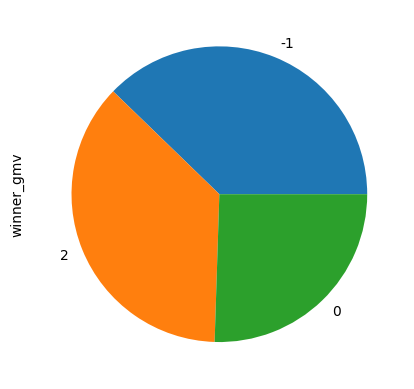

In [35]:
df_x.winner_gmv.value_counts().plot.pie()

<AxesSubplot: ylabel='winner_relevance'>

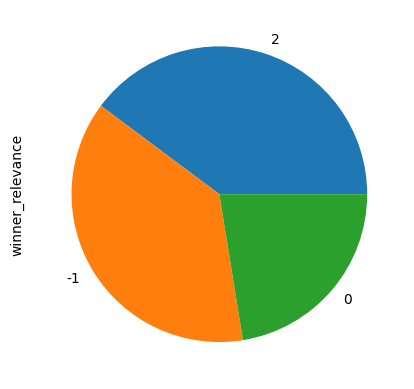

In [36]:
df_x.winner_relevance.value_counts().plot.pie()